In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
file_path = 'accidents_2017_to_2023_english.csv'
data = pd.read_csv(file_path)

# Inspect the dataset structure and content
print(data.head())

# Analyze the distribution of accident causes and types
cause_distribution = data['cause_of_accident'].value_counts()
type_distribution = data['type_of_accident'].value_counts()

# Display the top 10 causes and types of accidents
top_causes = cause_distribution.head(10)
top_types = type_distribution.head(10)

print("Top Causes of Accidents:\n", top_causes)
print("\nTop Types of Accidents:\n", top_types)


  inverse_data week_day      hour state  road_id     km            city  \
0   2017-01-01   sunday  01:45:00    RS    116.0   34,9         VACARIA   
1   2017-01-01   sunday  01:00:00    PR    376.0    636  TIJUCAS DO SUL   
2   2017-01-01   sunday  04:40:00    BA    101.0     65      ENTRE RIOS   
3   2017-01-01   sunday  06:30:00    PA    316.0   72,5       CASTANHAL   
4   2017-01-01   sunday  09:00:00    GO     20.0  220,5           POSSE   

                          cause_of_accident             type_of_accident  \
0         Mechanical loss/defect of vehicle           Rear-end collision   
1                     Incompatible velocity                 Run-off-road   
2                       Driver was sleeping            Head-on collision   
3  Driver's lack of attention to conveyance        Side impact collision   
4                             Road's defect  Collision with fixed object   

      victims_condition  ... slightly_injured severely_injured uninjured  \
0  With injured 

In [3]:
# Analyze accidents by day of the week
day_distribution = data['week_day'].value_counts()
print("\nAccidents by Day of the Week:\n", day_distribution)

# Analyze accidents by hour of the day
# Convert the 'hour' column to numeric (extract hour part)
data['hour_numeric'] = pd.to_datetime(data['hour'], format='%H:%M:%S', errors='coerce').dt.hour

hour_grouped_distribution = data['hour_numeric'].value_counts().sort_index()
print("\nAccidents by Hour of the Day:\n", hour_grouped_distribution)



Accidents by Day of the Week:
 week_day
saturday     77133
sunday       76960
friday       71435
monday       62816
thursday     60329
wednesday    57878
tuesday      56601
Name: count, dtype: int64

Accidents by Hour of the Day:
 hour_numeric
0     10176
1      8696
2      7858
3      8290
4     10238
5     13952
6     19845
7     26875
8     22763
9     19415
10    19180
11    20364
12    18830
13    20170
14    22293
15    24156
16    26155
17    30410
18    35469
19    29466
20    21708
21    18040
22    15843
23    12960
Name: count, dtype: int64



Weather Condition Distribution:
 wheather_condition
Clear sky    269961
Cloudy        78677
Rainy         54136
Sunny         32769
Drizzle       15986
Ignored        6674
Fog            3956
Windy           967
Hail             18
Snowy             8
Name: count, dtype: int64

Road Type Distribution:
 road_type
Simple      234109
Double      191626
Multiple     37417
Name: count, dtype: int64


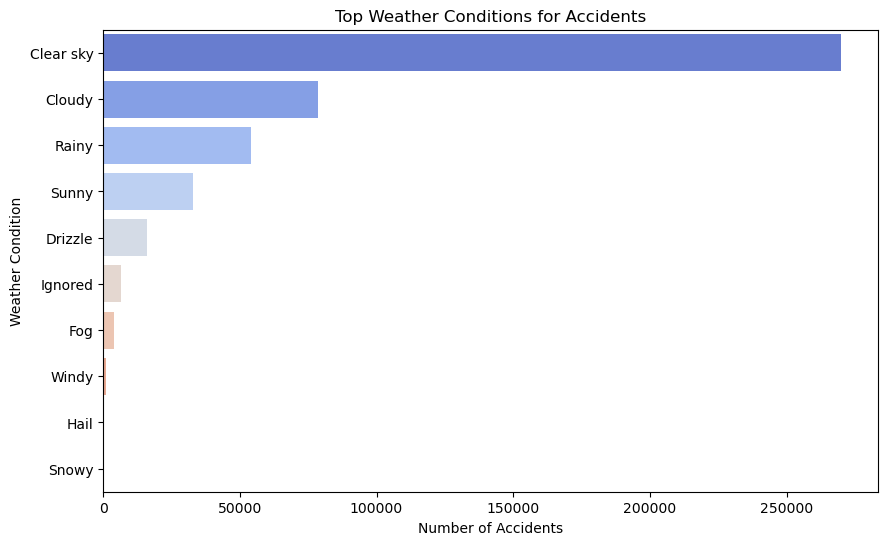

In [11]:
# Environmental Conditions: Weather and Road Types
weather_distribution = data['wheather_condition'].value_counts()
road_type_distribution = data['road_type'].value_counts()

print("\nWeather Condition Distribution:\n", weather_distribution)
print("\nRoad Type Distribution:\n", road_type_distribution)

# Visualize weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_distribution.head(10).values, y=weather_distribution.head(10).index, palette="coolwarm", hue=weather_distribution.head(10).index)
plt.title("Top Weather Conditions for Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()



Victim Statistics:
 deaths               36698
slightly_injured    386949
severely_injured    120202
uninjured           483563
dtype: int64


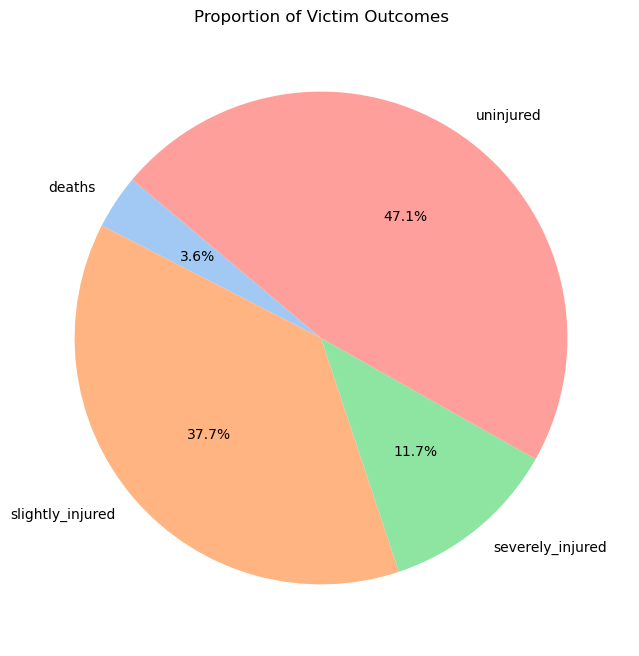

In [7]:
# Victim Severity: Deaths, Injuries, and Uninjured Cases
victim_stats = data[['deaths', 'slightly_injured', 'severely_injured', 'uninjured']].sum()
print("\nVictim Statistics:\n", victim_stats)

# Pie chart for victim conditions
plt.figure(figsize=(8, 8))
plt.pie(victim_stats, labels=victim_stats.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proportion of Victim Outcomes")
plt.show()


Correlation Matrix:
                      deaths  slightly_injured  severely_injured  uninjured  \
deaths             1.000000         -0.039571          0.099028  -0.015390   
slightly_injured  -0.039571          1.000000         -0.051474  -0.026105   
severely_injured   0.099028         -0.051474          1.000000  -0.059805   
uninjured         -0.015390         -0.026105         -0.059805   1.000000   
vehicles_involved  0.048997          0.083016          0.070472   0.440626   

                   vehicles_involved  
deaths                      0.048997  
slightly_injured            0.083016  
severely_injured            0.070472  
uninjured                   0.440626  
vehicles_involved           1.000000  


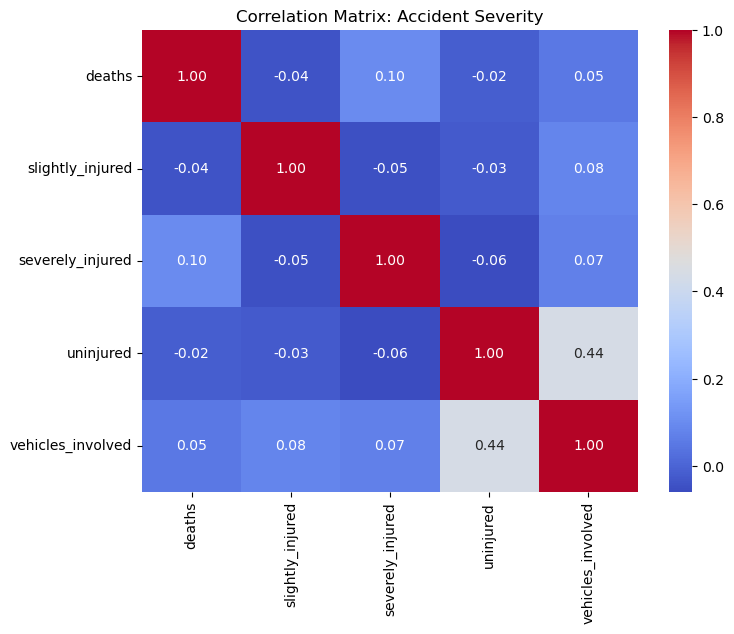

In [9]:
# Correlation Analysis: Severity vs. Number of Vehicles
correlation_matrix = data[['deaths', 'slightly_injured', 'severely_injured', 'uninjured', 'vehicles_involved']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Accident Severity")
plt.show()

In [21]:
# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['inverse_data'], errors='coerce')

# Extract the month
data['month'] = data['date'].dt.month

# Map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Fall'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

data['season'] = data['month'].apply(get_season)

# Aggregate accident counts by season
seasonal_counts = data['season'].value_counts()

# Summarize severity metrics by season
seasonal_severity = data.groupby('season')[['deaths', 'slightly_injured', 'severely_injured', 'uninjured']].sum()

print("Accidents by Season:\n", seasonal_counts)
print("\nSeverity by Season:\n", seasonal_severity)


Accidents by Season:
 season
Winter    121314
Summer    118184
Fall      117810
Spring    105844
Name: count, dtype: int64

Severity by Season:
         deaths  slightly_injured  severely_injured  uninjured
season                                                       
Fall      9023             96610             29944     119896
Spring    8502             88397             28055     107994
Summer    9084            102396             30312     129226
Winter   10089             99546             31891     126447


C:\Users\carsn\AppData\Local\Temp\ipykernel_15844\1180913187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette="coolwarm")


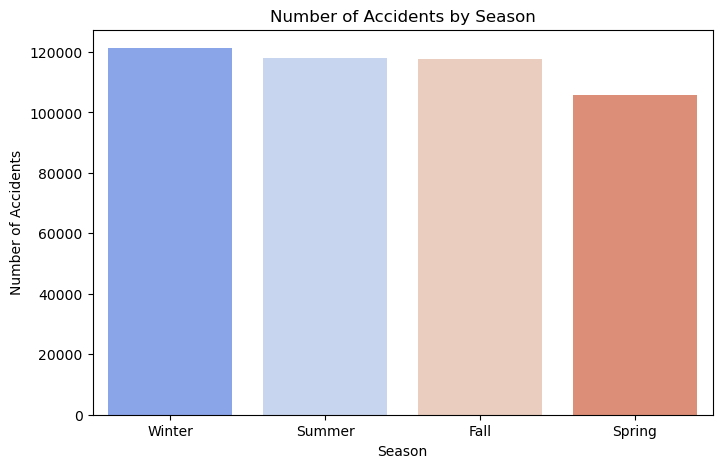

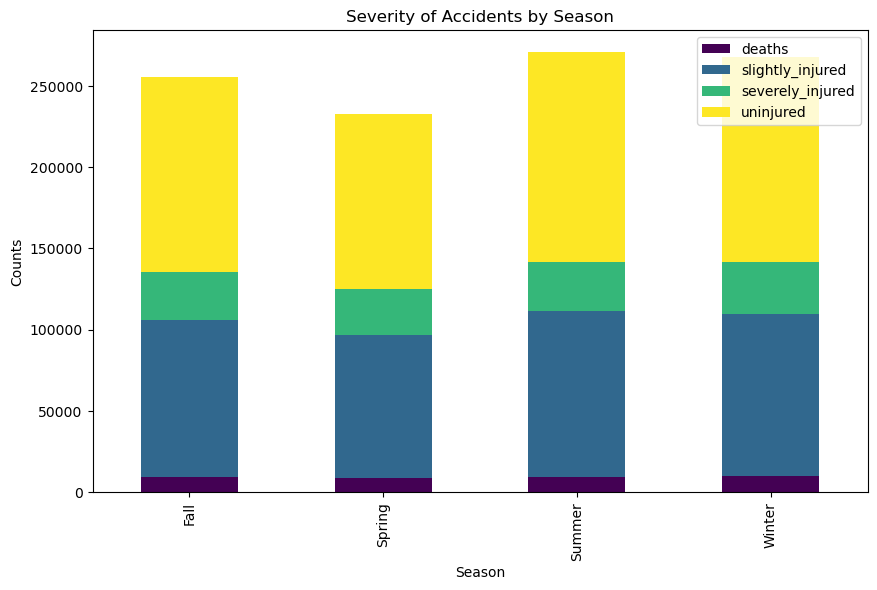

In [23]:
# Plot accident counts by season
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette="coolwarm")
plt.title("Number of Accidents by Season")
plt.xlabel("Season")
plt.ylabel("Number of Accidents")
plt.show()

# Plot severity metrics by season
seasonal_severity.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis')
plt.title("Severity of Accidents by Season")
plt.xlabel("Season")
plt.ylabel("Counts")
plt.show()

In [25]:
# Cross-tabulation for causes by season
causes_by_season = pd.crosstab(data['cause_of_accident'], data['season'])

# Cross-tabulation for types by season
types_by_season = pd.crosstab(data['type_of_accident'], data['season'])

# View top causes and types for a specific season
print("Top Causes in Winter:\n", causes_by_season['Winter'].sort_values(ascending=False).head(10))
print("\nTop Types in Winter:\n", types_by_season['Winter'].sort_values(ascending=False).head(10))
print("Top Causes in Spring:\n", causes_by_season['Spring'].sort_values(ascending=False).head(10))
print("\nTop Types in Spring:\n", types_by_season['Spring'].sort_values(ascending=False).head(10))
print("Top Causes in Summer:\n", causes_by_season['Summer'].sort_values(ascending=False).head(10))
print("\nTop Types in Summer:\n", types_by_season['Summer'].sort_values(ascending=False).head(10))
print("Top Causes in Fall:\n", causes_by_season['Fall'].sort_values(ascending=False).head(10))
print("\nTop Types in Fall:\n", types_by_season['Fall'].sort_values(ascending=False).head(10))


Top Causes in Winter:
 cause_of_accident
Driver's lack of attention to conveyance                           27386
Driver's lack of reaction                                          12592
Incompatible velocity                                              10048
Driver broke the laws of transit                                    7507
Alcohol consumption                                                 5638
Acessing the road without seeing the presence of other vehicles     4649
Disrespect of safe distance from the next car                       4487
Driver was sleeping                                                 4177
Mechanical loss/defect of vehicle                                   3839
Driver failed to keep distance from the vehicle in front            3528
Name: Winter, dtype: int64

Top Types in Winter:
 type_of_accident
Rear-end collision                 23264
Run-off-road                       17886
Broadside collision                15606
Overturn                            953

In [27]:
# Filter for deadly accidents
deadly_accidents = data[data['deaths'] > 0]

# Check for rarer deadly accidents
rare_deadly_accidents = deadly_accidents.groupby('cause_of_accident').filter(lambda x: len(x) < 10)

# Check for latitude and longitude columns
if 'latitude' in data.columns and 'longitude' in data.columns:
    print("Latitude and longitude columns are available.")
else:
    raise ValueError("Latitude and longitude columns are missing in the dataset.")

# Filter for rare deadly accidents
rare_deadly_accidents_with_coords = rare_deadly_accidents[['deaths', 'latitude', 'longitude', 'season']]


Latitude and longitude columns are available.


In [37]:
!pip install folium



   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.9 kB 445.2 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.9 kB 991.0 kB/s eta 0:00:01
   -------------------------------------- 108.9/108.9 kB 789.2 kB/s eta 0:00:00


In [39]:
import folium
from folium.plugins import MarkerCluster

# Initialize a map centered on an average location
center_lat = rare_deadly_accidents_with_coords['latitude'].mean()
center_lon = rare_deadly_accidents_with_coords['longitude'].mean()
accident_map = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Add a marker cluster for rare deadly accidents
marker_cluster = MarkerCluster().add_to(accident_map)

# Add markers for each deadly accident
for _, row in rare_deadly_accidents_with_coords.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Season: {row['season']}\nDeaths: {row['deaths']}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(marker_cluster)

# Save and display the map
accident_map.save("rare_deadly_accidents_map.html")

In [43]:
# Group rare deadly accidents by causes and count
rare_deadly_causes = rare_deadly_accidents.groupby('cause_of_accident').size().reset_index(name='count')

# Sort by count to identify the most common causes among the rare deadly accidents
rare_deadly_causes = rare_deadly_causes.sort_values(by='count', ascending=False)

print("Causes of Rare Deadly Accidents:\n", rare_deadly_causes)


Causes of Rare Deadly Accidents:
                                     cause_of_accident  count
5                                  Prominent downhill      9
0               Bad positioning of traffic sign posts      8
3                                Obstacle in the road      7
7                                    Temporary return      7
8                                       Unlevel track      7
10         Visibility restrictions in vertical curves      4
1               Car's suspension system with problems      3
4        Pedestrian crosswalk with insufficient width      3
6                                               Smoke      3
9        Visibility restrictions in horizontal curves      3
11                                  car's on sidewalk      3
12                               engaging in drifting      3
2   Failed to activate the motorcycle headlight (o...      2
15                                 suicide (presumed)      2
13          hidden/covered sinalization (of the roa

In [78]:
# Filter for accidents with severe injuries or deaths
severe_or_fatal_accidents = data[(data['deaths'] > 0) | (data['severely_injured'] > 0)]

# Group by latitude and longitude to count accidents
location_accident_counts = severe_or_fatal_accidents.groupby(['latitude', 'longitude']).size().reset_index(name='count')

# Sort to identify locations with most and least accidents
most_accidents = location_accident_counts.sort_values(by='count', ascending=False).head(100)
least_accidents = location_accident_counts.sort_values(by='count', ascending=True).head(10)

print("Locations with Most Severe or Fatal Accidents:\n", most_accidents)
print("\nLocations with Least Severe or Fatal Accidents:\n", least_accidents)


Locations with Most Severe or Fatal Accidents:
         latitude  longitude  count
75320  -3.769990  -38.67006    111
34958 -20.217400  -40.26991     75
13743 -25.568200  -48.61529     65
34846 -20.226620  -40.27075     65
62412  -8.766685  -63.88405     60
...          ...        ...    ...
64785  -8.059516  -34.94581     24
20202 -23.551300  -51.46127     24
35248 -20.167110  -44.33422     24
20689 -23.461440  -46.48885     24
77362  -2.530730  -44.30680     24

[100 rows x 3 columns]

Locations with Least Severe or Fatal Accidents:
            latitude     longitude  count
0     -1.984326e+07 -4.386112e+07      1
50360 -1.497118e+01 -4.939055e+01      1
50361 -1.497083e+01 -3.929764e+01      1
50363 -1.496970e+01 -3.931970e+01      1
50364 -1.496954e+01 -4.701073e+01      1
50366 -1.496760e+01 -3.931820e+01      1
50367 -1.496730e+01 -4.892727e+01      1
50368 -1.496720e+01 -4.091064e+01      1
50369 -1.496504e+01 -4.090870e+01      1
50371 -1.496294e+01 -3.931188e+01      1


In [51]:
# Filter for valid latitude and longitude ranges
valid_locations = data[
    (data['latitude'] >= -34.0) & (data['latitude'] <= 5.0) &
    (data['longitude'] >= -74.0) & (data['longitude'] <= -34.0)
]

# Check for missing or invalid coordinates
print(f"Number of valid entries: {len(valid_locations)}")
print(f"Number of invalid entries: {len(data) - len(valid_locations)}")


Number of valid entries: 463098
Number of invalid entries: 54


In [53]:
# Inspect invalid entries
invalid_locations = data[
    (data['latitude'] < -34.0) | (data['latitude'] > 5.0) |
    (data['longitude'] < -74.0) | (data['longitude'] > -34.0)
]
print("Invalid entries:\n", invalid_locations[['latitude', 'longitude']])


Invalid entries:
            latitude     longitude
10    -5.019941e+01 -9.450000e+01
70     0.000000e+00  0.000000e+00
114   -2.241851e+01 -4.059646e+02
117   -2.242356e+01 -7.631568e+02
135    1.300000e+01  4.000000e+01
166    1.255456e+01 -4.113281e+02
233   -2.631464e+01  3.111264e+02
301    1.580000e+02  5.530000e+02
321   -2.373232e+01 -4.068950e+02
355   -2.557372e+01 -4.088183e+02
528   -2.332490e+07 -5.138635e+07
24667 -2.336952e+01  3.099351e+02
24729 -1.227493e+01 -4.155582e+02
24775 -8.844694e+00 -4.085105e+02
24786 -1.984326e+07 -4.386112e+07
24813  1.630000e+02  7.170000e+02
24875 -2.545924e+01 -4.145838e+02
24921 -2.279184e+01 -4.032867e+02
24933  0.000000e+00  0.000000e+00
24962 -2.708955e+00 -9.311719e+01
24971 -1.033383e+09 -4.016764e+09
24985 -1.873210e+01 -4.082120e+02
24987 -1.159843e+01 -8.542969e+01
25056  2.600000e+01  4.800000e+01
25069 -1.449151e+01 -4.091529e+02
25182 -2.537910e+01 -4.121934e+02
25307  0.000000e+00  0.000000e+00
25320 -2.699686e+01 -4.086545e

In [80]:
# Filter severe or fatal accidents with valid coordinates
severe_or_fatal_accidents = valid_locations[(valid_locations['deaths'] > 0) | (valid_locations['severely_injured'] > 0)]

# Group by latitude and longitude for accident counts
location_accident_counts = severe_or_fatal_accidents.groupby(['latitude', 'longitude']).size().reset_index(name='count')

# Get locations with the most and least accidents
most_accidents = location_accident_counts.sort_values(by='count', ascending=False).head(100)
least_accidents = location_accident_counts.sort_values(by='count', ascending=True).head(10)


# Set the map center to Brazil's approximate center
center_lat, center_lon = -14.235, -51.925  # Brazil's approximate center
accident_map = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add markers for most accidents
for _, row in most_accidents.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Accidents: {row['count']} (Most)",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(accident_map)

# Add markers for least accidents
for _, row in least_accidents.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Accidents: {row['count']} (Least)",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(accident_map)

# Save the map
accident_map.save("severe_or_fatal_accidents_map.html")


In [82]:
# Combine most and least accidents locations into one DataFrame
map_locations = pd.concat([most_accidents, least_accidents])

# Filter the severe or fatal accidents for these locations
map_location_accidents = severe_or_fatal_accidents.merge(
    map_locations, 
    on=['latitude', 'longitude']
)

print("Accidents at Mapped Locations:\n", map_location_accidents[['latitude', 'longitude', 'cause_of_accident']])


Accidents at Mapped Locations:
        latitude  longitude                                  cause_of_accident
0     -5.044685  -42.76623      Disrespect of safe distance from the next car
1    -14.851000  -40.84850           Driver's lack of attention to conveyance
2    -25.530700  -49.19580                     Pedestrian's lack of attention
3     -3.736507  -38.65337                     Pedestrian's lack of attention
4    -16.067130  -47.98423      Disrespect of safe distance from the next car
...         ...        ...                                                ...
3483 -20.226620  -40.27075                 Pedestrian was walking in the road
3484 -20.226620  -40.27075                 Static object on the drainage gate
3485 -27.574130  -48.61363                          Driver's lack of reaction
3486 -20.172930  -40.26736          Driver disrespected the red traffic light
3487 -20.190200  -40.26829  Pedestrian was crossing the road outside of th...

[3488 rows x 3 columns]


In [84]:
# Initialize the map centered at Brazil
center_lat, center_lon = -14.235, -51.925  # Brazil's approximate center
mapped_causes_map = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add markers for each accident location with causes in the popup
for _, row in map_location_accidents.iterrows():
    cause = row['cause_of_accident']
    count = row['count'] if 'count' in row else 1  # Default to 1 if no count is present
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cause: {cause}<br>Accidents: {count}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(mapped_causes_map)

# Save the map to an HTML file
mapped_causes_map.save("mapped_causes_at_locations.html")


In [110]:
print(severe_or_fatal_accidents[['latitude', 'longitude', 'season', 'date']].head(10))



     latitude  longitude season       date
1  -25.754000  -49.12660   None 2017-01-01
2  -11.961800  -38.09530   None 2017-01-01
3   -1.289980  -47.83483   None 2017-01-01
4  -14.142210  -46.32259   None 2017-01-01
5   -5.313600  -37.56900   None 2017-01-01
9   -4.213500  -44.66290   None 2017-01-01
11  -4.788724  -47.50175   None 2017-01-01
14  -8.448591  -48.48497   None 2017-01-01
15  -8.007427  -34.93785   None 2017-01-01
22 -26.744190  -48.69664   None 2017-01-01


In [120]:
from folium import LayerControl
severe_or_fatal_accidents = severe_or_fatal_accidents.copy()

def get_season(date):
    if pd.isnull(date):
        return "Unknown"
    month = date.month
    if month in [12, 1, 2]:
        return "Summer"
    elif month in [3, 4, 5]:
        return "Autumn"
    elif month in [6, 7, 8]:
        return "Winter"
    elif month in [9, 10, 11]:
        return "Spring"

# Step 1: Filter accidents with severe injuries or deaths
severe_or_fatal_accidents['season'] = severe_or_fatal_accidents['date'].apply(get_season)

# Step 2: Initialize a folium map centered on Brazil
brazil_center = [-14.235, -51.925]
season_map = folium.Map(location=brazil_center, zoom_start=5)

# Step 3: Create layers for each season
seasons = ["Summer", "Autumn", "Winter", "Spring"]
colors = {"Summer": "red", "Autumn": "orange", "Winter": "blue", "Spring": "green"}

for season in seasons:
    # Filter data for the current season
    season_data = severe_or_fatal_accidents[severe_or_fatal_accidents['season'] == season]
    season_data = season_data.sort_values(
        by=['severely_injured', 'deaths'], ascending=False
    ).head(100)
    # Create a FeatureGroup for the season
    season_layer = folium.FeatureGroup(name=f"{season} Accidents")
    
    # Add markers to the map for each accident
    for _, row in season_data.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=(
                f"Date: {row['date']}<br>"
                f"Severity: {'Severe Injury' if row['severely_injured'] > 0 else 'Fatal'}<br>"
                f"Cause: {row['cause_of_accident']}"
            ),
            icon=folium.Icon(color=colors[season], icon="info-sign")
        ).add_to(season_layer)
    
    # Add the season layer to the map
    season_layer.add_to(season_map)

# Step 4: Add layer control to toggle seasons
LayerControl().add_to(season_map)

# Save the map to an HTML file
season_map.save("brazil_seasonal_accidents_map.html")


In [113]:
print(severe_or_fatal_accidents[['latitude', 'longitude', 'season', 'date']].head(10))

     latitude  longitude  season       date
1  -25.754000  -49.12660  Summer 2017-01-01
2  -11.961800  -38.09530  Summer 2017-01-01
3   -1.289980  -47.83483  Summer 2017-01-01
4  -14.142210  -46.32259  Summer 2017-01-01
5   -5.313600  -37.56900  Summer 2017-01-01
9   -4.213500  -44.66290  Summer 2017-01-01
11  -4.788724  -47.50175  Summer 2017-01-01
14  -8.448591  -48.48497  Summer 2017-01-01
15  -8.007427  -34.93785  Summer 2017-01-01
22 -26.744190  -48.69664  Summer 2017-01-01


Contingency Table:
 type_of_accident                                    Broadside collision  \
cause_of_accident                                                         
Acessing the road without seeing the presence o...                 9483   
Alcohol consumption                                                1950   
Disrespect of safe distance from the next car                       200   
Driver broke the laws of transit                                  11945   
Driver was sleeping                                                 149   
Driver's lack of attention to conveyance                          18940   
Driver's lack of reaction                                          1640   
Incompatible velocity                                               963   
Mechanical loss/defect of vehicle                                   217   
Slippery track                                                      230   

type_of_accident                                    Collision with fixed object

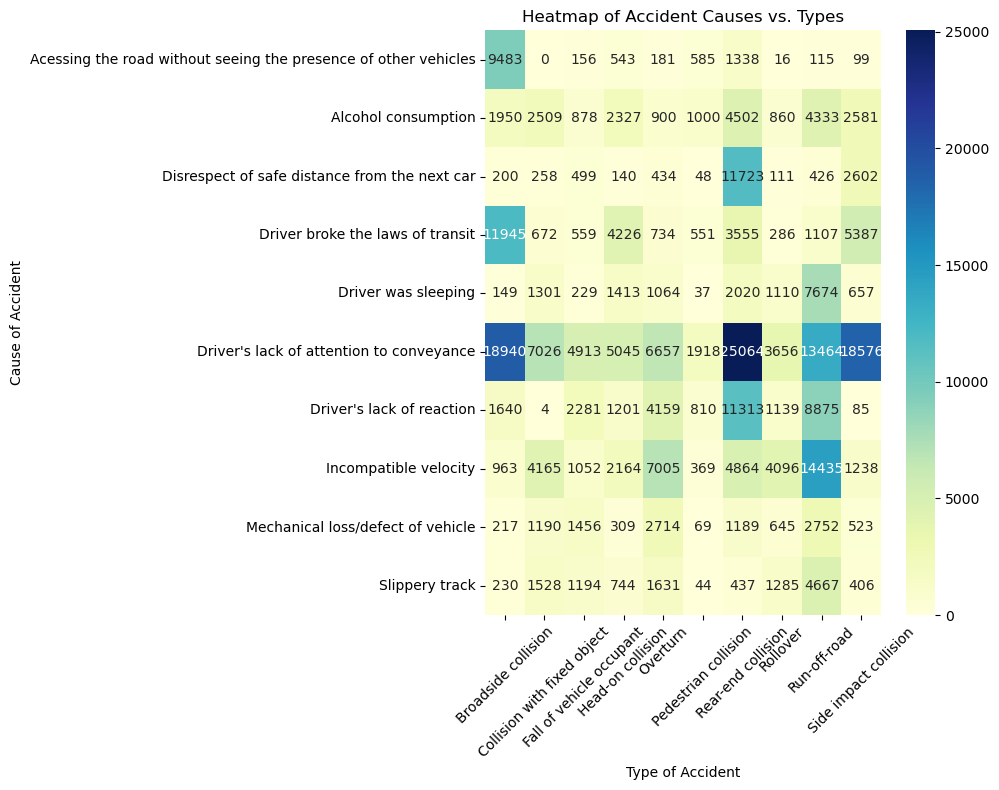

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

top_causes = data['cause_of_accident'].value_counts().head(10).index
top_types = data['type_of_accident'].value_counts().head(10).index

filtered_data = data[
    data['cause_of_accident'].isin(top_causes) &
    data['type_of_accident'].isin(top_types)
]

# Step 2: Create a contingency table
contingency_table = pd.crosstab(filtered_data['cause_of_accident'], filtered_data['type_of_accident'])

# Debug: Check contingency table
print("Contingency Table:\n", contingency_table)

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Accident Causes vs. Types")
plt.xlabel("Type of Accident")
plt.ylabel("Cause of Accident")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Contingency Table for Severe/Fatal Accidents:
 type_of_accident                                    Broadside collision  \
cause_of_accident                                                         
Acessing the road without seeing the presence o...                 3297   
Alcohol consumption                                                 514   
Driver broke the laws of transit                                   3699   
Driver was in the opposite direction                                125   
Driver was sleeping                                                  49   
Driver's lack of attention to conveyance                           5735   
Driver's lack of reaction                                           499   
Incompatible velocity                                               448   
Pedestrian's lack of attention                                       38   
The driver passed the next car improperly                           187   

type_of_accident                                    

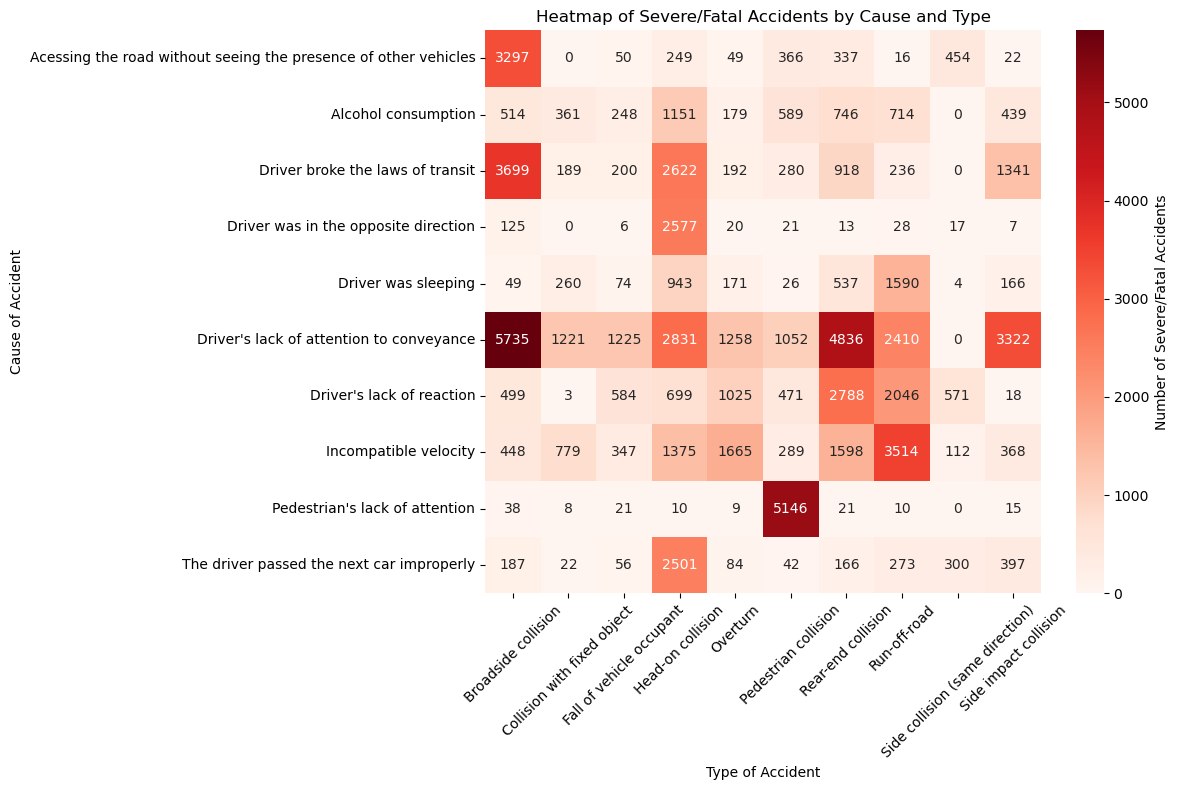

In [130]:
severe_fatal_accidents = data[
    (data['severely_injured'] > 0) | (data['deaths'] > 0)
]

# Step 2: Filter for top causes and types of accidents
top_causes = severe_fatal_accidents['cause_of_accident'].value_counts().head(10).index
top_types = severe_fatal_accidents['type_of_accident'].value_counts().head(10).index

filtered_severe_fatal = severe_fatal_accidents[
    severe_fatal_accidents['cause_of_accident'].isin(top_causes) &
    severe_fatal_accidents['type_of_accident'].isin(top_types)
]

# Step 3: Create a contingency table for severe or fatal accidents
contingency_table_severe_fatal = pd.crosstab(
    filtered_severe_fatal['cause_of_accident'], 
    filtered_severe_fatal['type_of_accident']
)

# Debug: Check the contingency table
print("Contingency Table for Severe/Fatal Accidents:\n", contingency_table_severe_fatal)

# Step 4: Visualize the table
plt.figure(figsize=(12, 8))
sns.heatmap(
    contingency_table_severe_fatal, 
    annot=True, 
    fmt="d", 
    cmap="Reds", 
    cbar_kws={'label': 'Number of Severe/Fatal Accidents'}
)
plt.title("Heatmap of Severe/Fatal Accidents by Cause and Type")
plt.xlabel("Type of Accident")
plt.ylabel("Cause of Accident")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()